In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

based on question2 all these formulas

In [ ]:
def calculate_slope_intercept(x, y):
    n = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    numerator = np.sum((x-x_mean)*(y-y_mean))
    denominator = np.sum((x-x_mean)**2)
    m = numerator/denominator
    b = y_mean - m*x_mean
    return m,b

In [ ]:
def predict_values(x,m,b):
    y_pred = m*x+b
    return y_pred

In [ ]:
def calculate_mse(y_true,y_pred):
    mse = np.mean((y_true-y_pred)**2)
    return mse

In [ ]:
def calculate_rsq(y_true, y_pred):
    y_mean = np.mean(y_true)
    ss_total = np.sum((y_true-y_mean)**2)
    ss_residual = np.sum((y_true-y_pred)**2)
    rsq = 1 - (ss_residual/ss_total)
    return rsq

1. lets first import the dataset

In [ ]:
tips = sns.load_dataset('tips')

preprocess the tips dataset

In [ ]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [ ]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [ ]:
tips.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


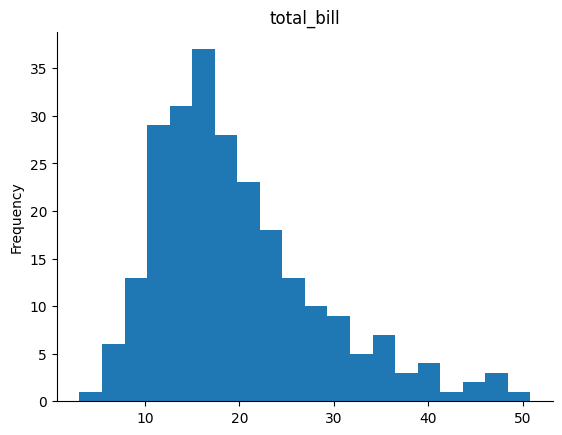

In [ ]:
tips['total_bill'].plot(kind='hist', bins=20, title='total_bill')
plt.gca().spines[['top', 'right',]].set_visible(False)

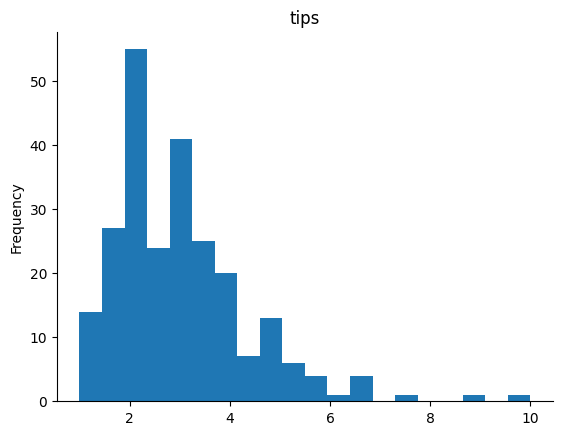

In [ ]:
tips['tip'].plot(kind='hist', bins=20, title='tips')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
tips.isna().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


no null values so not needed to impute with mean so not dont needed to fill the dataset

2. Finding the slope(m) and intercept (b)


<BarContainer object of 244 artists>

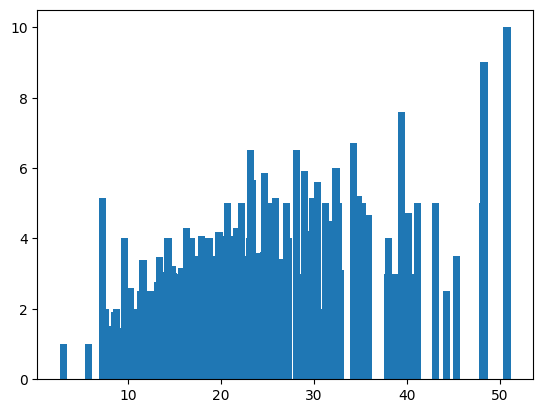

In [ ]:
plt.bar(tips['total_bill'],tips['tip'])

In [ ]:
x = tips['total_bill']
y = tips['tip']
m, b = calculate_slope_intercept(x,y)
y_pred = predict_values(x, m, b)
mse = calculate_mse(y,y_pred)
rsq = calculate_rsq(y,y_pred)
print("Slope (m):", m)
print("Intercept (b): ",b)
print("Mean Squared Error: ", mse)
print("R-squared: ",rsq)

Slope (m): 0.1050245173843534
Intercept (b):  0.9202696135546726
Mean Squared Error:  1.036019442011377
R-squared:  0.45661658635167657


<Axes: xlabel='total_bill', ylabel='tip'>

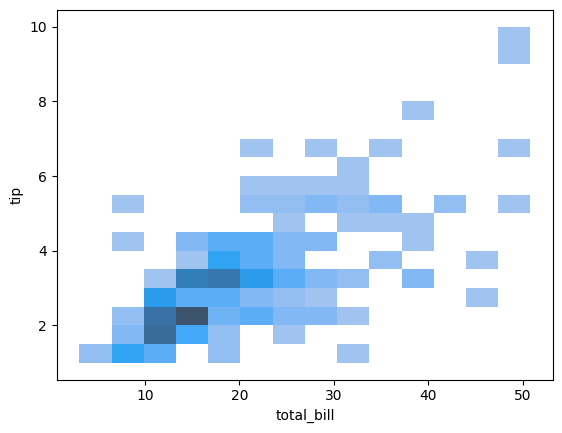

In [ ]:
sns.histplot(x="total_bill",y="tip",data=tips)

<Axes: xlabel='total_bill', ylabel='tip'>

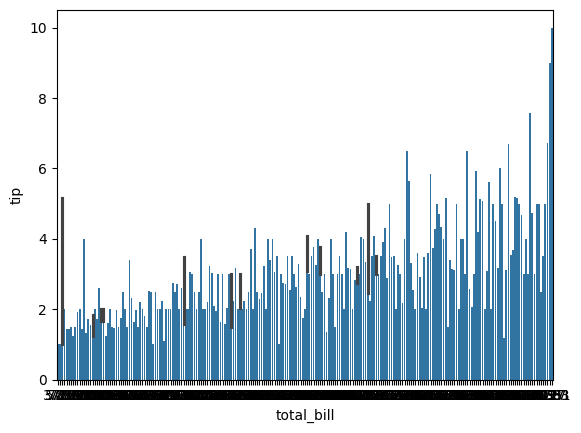

In [ ]:
sns.barplot(x="total_bill",y="tip",data=tips)

<Axes: xlabel='total_bill', ylabel='tip'>

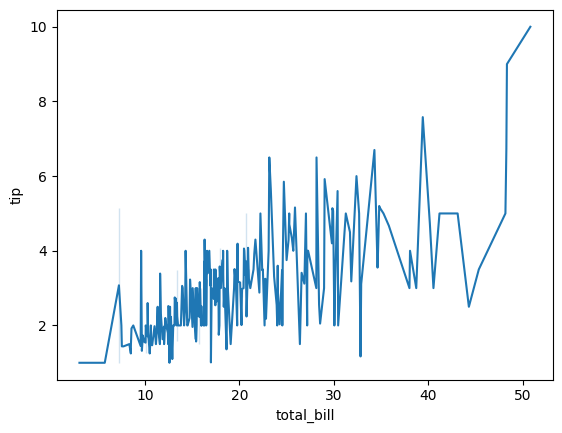

In [ ]:
sns.lineplot(x="total_bill",y="tip",data=tips)

Predicting Y for given input any x

In [ ]:
new_x = 20
predicted_y = predict_values(new_x, m, b)
print("Predicted tip for a total bill of ",new_x, "$ is "  ,": ",predicted_y,"$")

Predicted tip for a total bill of  20 $ is  :  3.0207599612417404 $


3. Implemenet a fucntion to compute MSE and Rsq based on formulae

In [ ]:
mse = calculate_mse(y, y_pred)
rsq = calculate_rsq(y, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", rsq)

Mean Squared Error: 1.036019442011377
R-squared: 0.45661658635167657


4. Testing the implementation on a sample dataset

In [ ]:
sample_data = {'total_bill': [10, 20, 30, 40], 'tip': [1, 3, 5, 7]}
sample_df = pd.DataFrame(sample_data)
print(sample_df)

   total_bill  tip
0          10    1
1          20    3
2          30    5
3          40    7


In [ ]:
x_sample = sample_df['total_bill']
y_sample = sample_df['tip']
m_sample, b_sample = calculate_slope_intercept(x_sample, y_sample)
y_pred_sample = predict_values(x_sample, m_sample, b_sample)
mse_sample = calculate_mse(y_sample, y_pred_sample)
rsq_sample = calculate_rsq(y_sample, y_pred_sample)

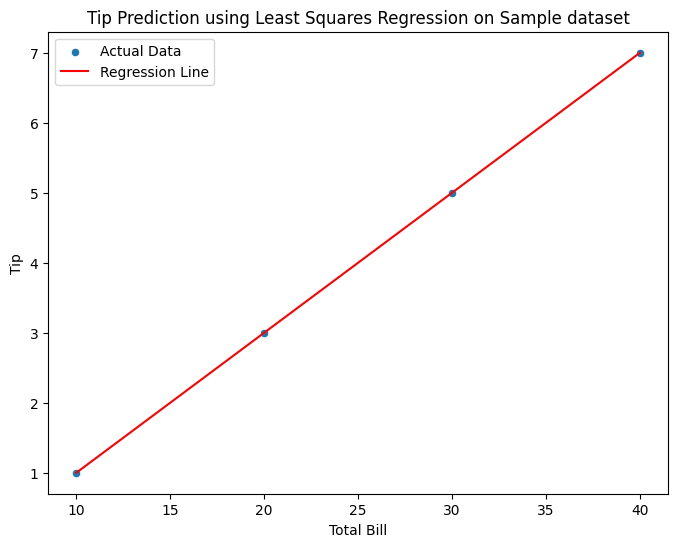

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_bill', y='tip', data=sample_df, label='Actual Data')
plt.plot(x_sample, y_pred_sample, color='red', label='Regression Line')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Tip Prediction using Least Squares Regression on Sample dataset')
plt.legend()
plt.show()

In [ ]:
print("Sample Data Results")
print("Slope (m):", m_sample)
print("Intercept (b): ", b_sample)
print("Mean Squared Error: ", mse_sample)
print("R-squared: ", rsq_sample)
new_x_sample = 35
predicted_y_sample = predict_values(new_x_sample, m_sample, b_sample)
print("Predicted tip for a total bill of ",new_x_sample, "$ is "  ,": ",predicted_y_sample,"$")

Sample Data Results
Slope (m): 0.2
Intercept (b):  -1.0
Mean Squared Error:  0.0
R-squared:  1.0
Predicted tip for a total bill of  35 $ is  :  6.0 $


5. Lets plot all dataset and then regression line for visulinzation

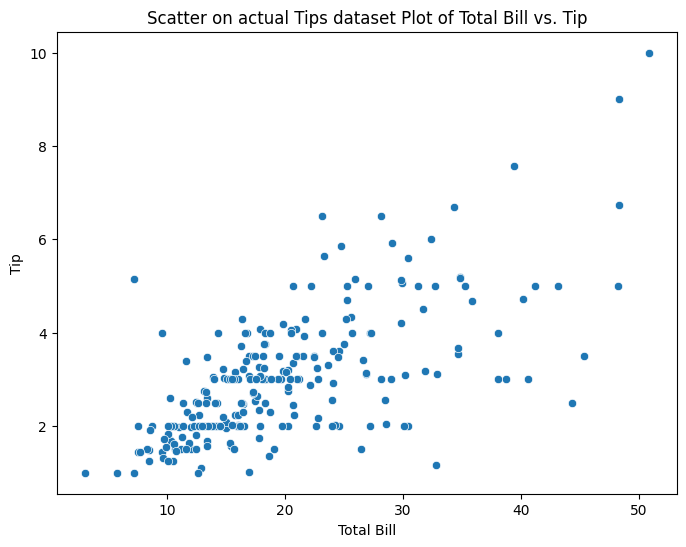

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_bill', y='tip', data=tips)
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Scatter on actual Tips dataset Plot of Total Bill vs. Tip')
plt.show()

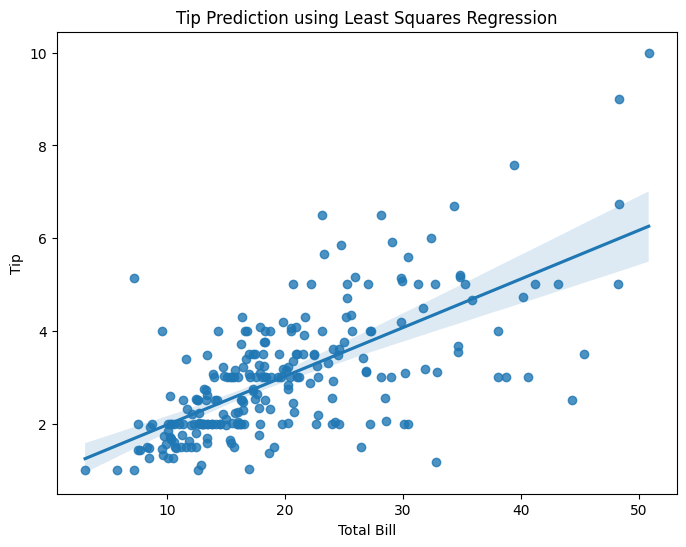

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x='total_bill', y='tip', data=tips)
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Tip Prediction using Least Squares Regression')
plt.show()

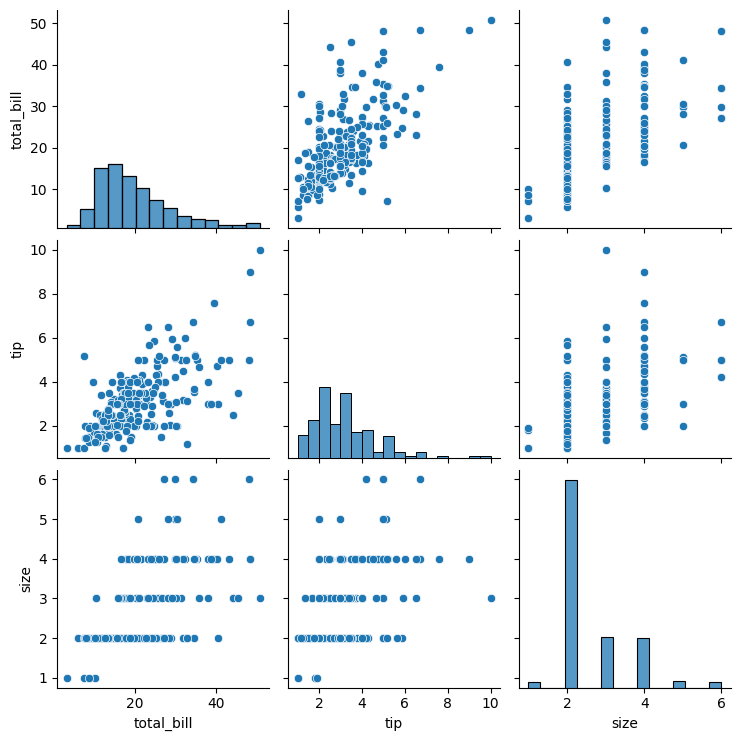

In [ ]:
sns.pairplot(tips)

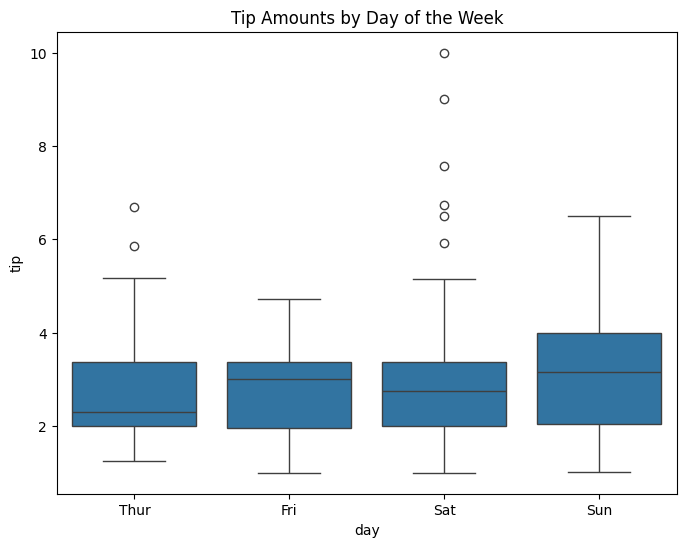

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='day', y='tip', data=tips)
plt.title('Tip Amounts by Day of the Week')
plt.show()

In [ ]:
numerical_features = tips.select_dtypes(include=['number'])
print(numerical_features)

     total_bill   tip  size
0         16.99  1.01     2
1         10.34  1.66     3
2         21.01  3.50     3
3         23.68  3.31     2
4         24.59  3.61     4
..          ...   ...   ...
239       29.03  5.92     3
240       27.18  2.00     2
241       22.67  2.00     2
242       17.82  1.75     2
243       18.78  3.00     2

[244 rows x 3 columns]


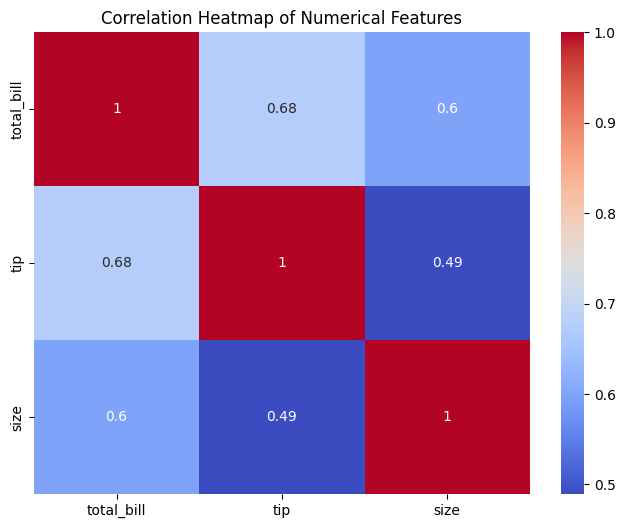

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

<Figure size 800x600 with 0 Axes>

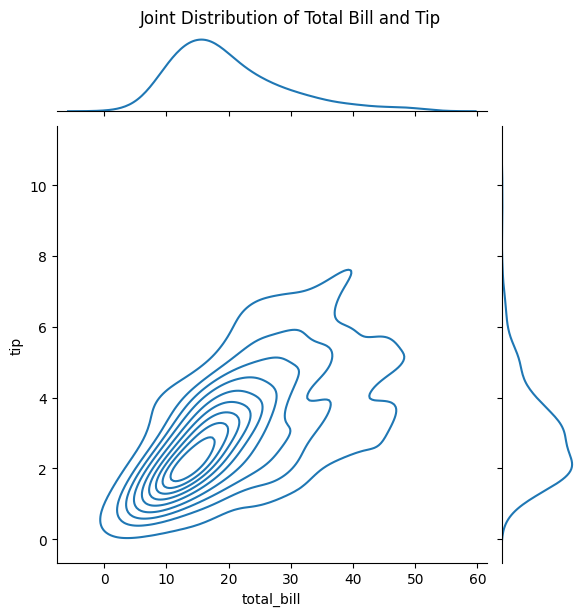

In [ ]:
plt.figure(figsize=(8, 6))
sns.jointplot(x='total_bill', y='tip', data=tips, kind='kde')
plt.suptitle('Joint Distribution of Total Bill and Tip', y=1.02)
plt.show()
